<!--Información del curso-->
<img align="left" style="padding-right:10px;" src="figuras/logo_ciencia_datos.png">

<center><h2 style="font-size:2em;color:#840700">   Manipulación básica de series temporales </h4></center>

<br>
<table>
<col width="550">
<col width="450">
<tr>
<td><img src="figuras/pandas_presentacion.png" align="left" style="width:400px"/></td>
<td>

* **Wes McKinney**, empezó a desarrollar Pandas en el año 2008 mientras trabajaba en *AQR Capital* [https://www.aqr.com/] por la necesidad que tenía de una herramienta flexible de alto rendimiento para realizar análisis cuantitativos en datos financieros. 
* Antes de dejar AQR convenció a la administración de la empresa de distribuir esta biblioteca bajo licencia de código abierto.
* **Pandas** es un acrónimo de **PANel DAta analysiS**
   
    
<br>
</td>
</tr>
</table>

# Librerías

Cargando las bibliotecas que necesitamos 


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Trabajar con el tiempo

Pandas se desarrolló en el contexto del modelado financiero, por lo que, como era de esperar, contiene un conjunto bastante extenso de herramientas para trabajar con fechas, horas y datos indexados por tiempo.
Los datos de fecha y hora vienen en distintasmaneras, que discutiremos aquí:

- *Marcas de tiempo* o *Time stamps*: hacen referencia a momentos particulares en el tiempo (por ejemplo, 19 de Noviembre de 2020 a las 10:00 a.m.).
- *Intervalos de tiempo* hacen referencia a un período de tiempo entre un punto inicial y final en particular; por ejemplo, el año 2020. Los períodos generalmente hacen referencia a un caso especial de intervalos de tiempo en los que cada intervalo tiene una duración uniforme y no se superpone (por ejemplo, períodos de 24 horas que comprenden días).
- *Los  delta de tiempo* o *duraciones* hacen referencia a un período de tiempo exacto (por ejemplo, una duración de 22 segundos).

En esta lección, presentaremos cómo trabajar con cada uno de estos tipos de datos de fecha/hora en Pandas. Comenzaremos con una breve discusión de las herramientas para trabajar con fechas y horas en Python, antes de pasar más específicamente a una discusión de las herramientas proporcionadas por Pandas.

## Fechas y horas en Python


El mundo de Python tiene varias representaciones disponibles de fechas, horas, deltas e intervalos de tiempo.
Si bien las herramientas de series de tiempo proporcionadas por Pandas tienden a ser las más útiles para las aplicaciones de ciencia de datos, es útil ver su relación con otros paquetes utilizados en Python.


### Fechas y horas de Python nativo: ``datetime`` 

Los objetos básicos de Python para trabajar con fechas y horas residen en el módulo integrado ``datetime`` y puede usarlo para realizar rápidamente una serie de funcionalidades útiles en fechas y horas.
Por ejemplo, puede crear manualmente una fecha usando el tipo ``datetime``:


In [2]:
from datetime import datetime
fecha = datetime(year=2020, month=11, day=19)

Una vez que tenga un objeto ``datetime``, puede hacer cosas como imprimir el día de la semana de varias maneras:

In [3]:
fecha.strftime('%A')

'Thursday'

In [4]:
print(fecha.strftime("%d %B %Y"))

19 November 2020


En estas últimas líneas, usamos códigos de formato de cadena estándar para imprimir fechas, sobre el cual puede leer en la [strftime section](https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior) de la documentación de Python [datetime documentation](https://docs.python.org/3/library/datetime.html).

El poder de datetime radica en su flexibilidad y sintaxis sencilla: puede usar estos objetos y sus métodos integrados para realizar fácilmente casi cualquier operación que le pueda interesar. El problema es que no esta optimizado para trabajar con  grandes cantidades de fechas y horas: así como las listas de variables numéricas de Python no son optimas en comparación con los arreglos numéricos de NumPy.

### Arreglos de tiempo de Numpy:  ``datetime64``

Las debilidades del formato de fecha y hora de Python inspiraron al equipo de NumPy a agregar un conjunto de tipos de datos de series de tiempo nativos a NumPy. El tipo ``datetime64`` codifica las fechas como enteros de 64 bits y, por lo tanto, permite que los arreglos de fechas se representen de forma muy compacta.
El ``datetime64`` requiere un formato de entrada muy específico:


In [5]:
import numpy as np
fecha = np.array('2020-11-19', dtype=np.datetime64)  #año - mes - día
fecha

array('2020-11-19', dtype='datetime64[D]')

Una vez que tengamos esta fecha, podemos realizar rápidamente operaciones vectorizadas en ella:

In [6]:
#Mostrar los siguientes 20 días
fecha + np.arange(20)

array(['2020-11-19', '2020-11-20', '2020-11-21', '2020-11-22',
       '2020-11-23', '2020-11-24', '2020-11-25', '2020-11-26',
       '2020-11-27', '2020-11-28', '2020-11-29', '2020-11-30',
       '2020-12-01', '2020-12-02', '2020-12-03', '2020-12-04',
       '2020-12-05', '2020-12-06', '2020-12-07', '2020-12-08'],
      dtype='datetime64[D]')

Si bien el tipo de datos ``datetime64`` aborda algunas de las deficiencias del tipo ``datetime`` incorporado de Python, carece de muchos de los métodos y funciones convenientes que han sido incluidas en Pandas.

### Fechas y horas en pandas

Pandas se basa en los conceptos de tiempo de Python y Numpy que acabamos de comentar para proporcionar un objeto de ``Marca de Tiempo`` o ``Timestamp``, que combina la facilidad de uso de ``datetime``  con el almacenamiento eficiente y la interfaz vectorizada de ``numpy.datetime64``.
A partir de un grupo de estos objetos ``Timestamp``, Pandas puede construir un ``DatetimeIndex`` que se puede usar para indexar datos en una ``Serie`` o ``DataFrame``; veremos muchos ejemplos de esto en esta lección.

Por ejemplo, podemos usar las herramientas de Pandas para repetir la demostración de arriba.
Podemos analizar una fecha de cadena con formato flexible y usar códigos de formato para generar días de la semana:


In [7]:
import pandas as pd
fecha = pd.to_datetime("19th of November, 2020")
fecha

Timestamp('2020-11-19 00:00:00')

In [8]:
fecha.strftime('%A')

'Thursday'

In [9]:
fecha.strftime("%d %B %Y")

'19 November 2020'

Además, podemos hacer operaciones vectorizadas al estilo NumPy directamente en este mismo objeto:

In [10]:
fecha + pd.to_timedelta(np.arange(20), 'D')

DatetimeIndex(['2020-11-19', '2020-11-20', '2020-11-21', '2020-11-22',
               '2020-11-23', '2020-11-24', '2020-11-25', '2020-11-26',
               '2020-11-27', '2020-11-28', '2020-11-29', '2020-11-30',
               '2020-12-01', '2020-12-02', '2020-12-03', '2020-12-04',
               '2020-12-05', '2020-12-06', '2020-12-07', '2020-12-08'],
              dtype='datetime64[ns]', freq=None)

En la siguiente sección, veremos más de cerca la manipulación de datos de series de tiempo con las herramientas proporcionadas por Pandas.

## Fecha y hora en pandas

### Objetos tipo ``Timestamp`` 

Pandas tiene sus propios objetos de fecha y hora, que son compatibles con los objetos estándar `datetime`, pero proporcionan algunas funcionalidades más para trabajar.

El objeto `Timestamp` también se puede construir a partir de una cadena:

In [11]:
ts = pd.Timestamp('00:00:00')
ts

Timestamp('2024-09-25 00:00:00')

Al igual que con los objetos `datetime.datetime`, hay varios atributos útiles disponibles en `Timestamp`. Por ejemplo, podemos obtener el mes:

In [12]:
ts.month

9

También hay un tipo `Timedelta`, que puede ser usado para agregar intervalos de tiempo:

In [13]:
ts + pd.Timedelta('5 days')

Timestamp('2024-09-30 00:00:00')

## Analizando cadenas de fecha y hora


<img align="left" width="400"  float= "none" align="middle" src="figuras/iso_8601.png">

Desafortunadamente, cuando se trabaja con datos del mundo real, se pueden encontrar muchos formatos diferentes para `fecha y hora`. Para trabajar con esos datos en Pandas, primero es necesario cambiar las cadenas de teimpo a objetos reales de `Timestamp`.

**Para convertir fechas con formato de cadena en objetos de marca de tiempo: use la función `pandas.to_datetime`**. Aquí se muestran algunos ejemplos


In [14]:
pd.to_datetime("2-13-20")

Timestamp('2020-02-13 00:00:00')

In [15]:
pd.to_datetime("02/13/20")

Timestamp('2020-02-13 00:00:00')

In [16]:
pd.to_datetime("3/2/2020", dayfirst=True)

Timestamp('2020-02-03 00:00:00')

In [17]:
pd.to_datetime("13/02/1920", format="%d/%m/%Y")

Timestamp('1920-02-13 00:00:00')

In [18]:
pd.to_datetime("02-13-2020")

Timestamp('2020-02-13 00:00:00')

In [19]:
pd.to_datetime("02--13--2020")

Timestamp('2020-02-13 00:00:00')

Una descripción detallada de cómo especificar la cadena `format`, vea la tabla en la documentación de python: https://docs.python.org/3.5/library/datetime.html#strftime-and-strptime-behavior

## `Timestamp`  en una Serie o DataFrame

In [20]:
serie = pd.Series(['2020-2-13 10:00:00', '2020-2-13 11:00:00', '2020-2-13 12:00:00'])

In [21]:
serie


0    2020-2-13 10:00:00
1    2020-2-13 11:00:00
2    2020-2-13 12:00:00
dtype: object

La función `to_datetime`  también se puede utilizar para convertir una serie:

In [22]:
temp_serie = pd.to_datetime(serie)

In [23]:
temp_serie

0   2020-02-13 10:00:00
1   2020-02-13 11:00:00
2   2020-02-13 12:00:00
dtype: datetime64[ns]

Observe que el tipo de datos de esta serie ha cambiado ahora es del tipo `datetime64 [ns]`. Esto indica que tenemos una serie de valores de fecha y hora reales.

Los mismos atributos que en un `Timestamp` también están disponibles en una Serie con datos de fecha y hora, utilizando el descriptor de acceso **`.dt` **:

In [24]:
temp_serie.dt.hour

0    10
1    11
2    12
dtype: int32

In [25]:
temp_serie.dt.weekday

0    3
1    3
2    3
dtype: int32

Para construir rápidamente algunos datos regulares temporales, la función [`` pd.date_range``] (http://pandas.pydata.org/pandas-docs/stable/generated/pandas.date_range.html) es útil:

In [26]:
date_rng = pd.date_range(start="2020-10-25", periods=30, freq='12H')
date_rng

/tmp/ipykernel_16537/3908586605.py:1: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  date_rng = pd.date_range(start="2020-10-25", periods=30, freq='12H')


DatetimeIndex(['2020-10-25 00:00:00', '2020-10-25 12:00:00',
               '2020-10-26 00:00:00', '2020-10-26 12:00:00',
               '2020-10-27 00:00:00', '2020-10-27 12:00:00',
               '2020-10-28 00:00:00', '2020-10-28 12:00:00',
               '2020-10-29 00:00:00', '2020-10-29 12:00:00',
               '2020-10-30 00:00:00', '2020-10-30 12:00:00',
               '2020-10-31 00:00:00', '2020-10-31 12:00:00',
               '2020-11-01 00:00:00', '2020-11-01 12:00:00',
               '2020-11-02 00:00:00', '2020-11-02 12:00:00',
               '2020-11-03 00:00:00', '2020-11-03 12:00:00',
               '2020-11-04 00:00:00', '2020-11-04 12:00:00',
               '2020-11-05 00:00:00', '2020-11-05 12:00:00',
               '2020-11-06 00:00:00', '2020-11-06 12:00:00',
               '2020-11-07 00:00:00', '2020-11-07 12:00:00',
               '2020-11-08 00:00:00', '2020-11-08 12:00:00'],
              dtype='datetime64[ns]', freq='12h')

A partir del rango de fechas se puede crear una DataFrame con valores. Para esto se puede utilizar la función ``randint``  con la que se pueden conseguir número aleatorios en un rango. A continuación, se muestra un código con un ejemplo y los cinco primeros registros obtenidos.

In [27]:
df_temp = pd.DataFrame(date_rng, columns=['fecha'])
df_temp['valor'] = np.random.randint(0,100,size=(len(date_rng)))
df_temp.head(5)

,fecha,valor
0,2020-10-25 00:00:00,27
1,2020-10-25 12:00:00,33
2,2020-10-26 00:00:00,40
3,2020-10-26 12:00:00,32
4,2020-10-27 00:00:00,1


Si se desea realizar la manipulación de una serie temporal se ha de utilizar la fecha como índice del *DataFrame*. Modificar el índice del *DataFrame* es realmente sencillo, para lo que se puede utilizar el siguiente código:

In [28]:
df_temp = df_temp.set_index('fecha')
df_temp

,valor
fecha,
2020-10-25 00:00:00,27
2020-10-25 12:00:00,33
2020-10-26 00:00:00,40
2020-10-26 12:00:00,32
2020-10-27 00:00:00,1
2020-10-27 12:00:00,68
2020-10-28 00:00:00,61
2020-10-28 12:00:00,40
2020-10-29 00:00:00,58


## Funciones  para la manipulación básica de series temporales con pandas

Una de las primeras operaciones que se puede realizar con la serie temporal el seleccionar un periodo de tiempo. En caso de que se necesiten los registros de un día simplemente se ha de indicar la fecha y, en el ejemplo, se obtendrá los 15 registros. Por ejemplo, los datos del día 1 noviembre de 2020 se obtendrían con la línea:

In [29]:
#Utilizando el separador "-"
df_temp.loc['2020-11-1',:]

,valor
fecha,
2020-11-01 00:00:00,92
2020-11-01 12:00:00,28


Para seleccionar todos los datos de noviembre

In [30]:
df_temp.loc['2020-11']

,valor
fecha,
2020-11-01 00:00:00,92
2020-11-01 12:00:00,28
2020-11-02 00:00:00,82
2020-11-02 12:00:00,90
2020-11-03 00:00:00,8
2020-11-03 12:00:00,51
2020-11-04 00:00:00,99
2020-11-04 12:00:00,75
2020-11-05 00:00:00,42


Para conseguir un periodo de tiempo simplemente se ha de indicar la fecha inicial y final separada por dos puntos. Por ejemplo, los dato entre el 30 de octubre y el 2 de noviembre de 2020 se pueden obtener mediante el código:

In [31]:
df_temp.loc['2020-10-30':'2020-11-2']

,valor
fecha,
2020-10-30 00:00:00,71
2020-10-30 12:00:00,5
2020-10-31 00:00:00,64
2020-10-31 12:00:00,8
2020-11-01 00:00:00,92
2020-11-01 12:00:00,28
2020-11-02 00:00:00,82
2020-11-02 12:00:00,90


Tambien se puede incluir un horario en particular, por ejemplo los datos entre las 3:00:00 del 30 de octubre    y  las 18:00:00 el 2 de noviembre de 2020  se pueden obtener mediante el código:

In [32]:
df_temp['2020-10-30 3:00:00 ':'2020-11-2 18:00:00']

,valor
fecha,
2020-10-30 12:00:00,5
2020-10-31 00:00:00,64
2020-10-31 12:00:00,8
2020-11-01 00:00:00,92
2020-11-01 12:00:00,28
2020-11-02 00:00:00,82
2020-11-02 12:00:00,90


Seleccionar los datos a partir de una fecha, por ejemplo todos los datos despues del 2 de noviembre

In [33]:
df_temp.loc['2020-11-2':,:]

,valor
fecha,
2020-11-02 00:00:00,82
2020-11-02 12:00:00,90
2020-11-03 00:00:00,8
2020-11-03 12:00:00,51
2020-11-04 00:00:00,99
2020-11-04 12:00:00,75
2020-11-05 00:00:00,42
2020-11-05 12:00:00,13
2020-11-06 00:00:00,54


## Remuestreo de las series temporales


Los datos que se han utilizado hasta ahora tienen una frecuencia horaria. En el caso de que se desee los datos con otra frecuencia estos se pueden remuestrear. Esto se consigue con la función ``resample``, al que se le ha de indicar el periodo y a su resultado se le puede aplicar una operación. Por ejemplo, la media semanal se puede obtener mediante el código:

In [34]:
#Semanal
df_temp.resample('D').mean()

,valor
fecha,
2020-10-25,30.0
2020-10-26,36.0
2020-10-27,34.5
2020-10-28,50.5
2020-10-29,77.0
2020-10-30,38.0
2020-10-31,36.0
2020-11-01,60.0
2020-11-02,86.0


In [35]:
#Mensual
df_temp.resample('W').mean()

,valor
fecha,
2020-10-25,30.000000
2020-11-01,47.428571
2020-11-08,51.214286


In [36]:
#Mensual (muestra desde el inicio de mes)
df_temp.resample('MS').mean()

,valor
fecha,
2020-10-01,43.142857
2020-11-01,52.312500


In [37]:
#Por día el valor maximo
df_temp.resample('D').max()

,valor
fecha,
2020-10-25,33
2020-10-26,40
2020-10-27,68
2020-10-28,61
2020-10-29,96
2020-10-30,71
2020-10-31,64
2020-11-01,92
2020-11-02,90


In [38]:
#Cada 3 días  el valor maximo
df_temp.resample('3D').max()

,valor
fecha,
2020-10-25,68
2020-10-28,96
2020-10-31,92
2020-11-03,99
2020-11-06,98


Fundamental para estas herramientas de series de tiempo de Pandas es el concepto de una frecuencia o desplazamiento de fecha. Así como vimos los códigos  ``W``(semana)  y  ``M``(mes), podemos usar dichos códigos para especificar cualquier espaciado de frecuencia deseado. La siguiente tabla resume los principales códigos disponibles:


| Code   | Description         | Code   | Description          |
|--------|---------------------|--------|----------------------|
| ``D``  | Calendar day        | ``B``  | Business day         |
| ``W``  | Weekly              |        |                      |
| ``M``  | Month end           | ``BM`` | Business month end   |
| ``Q``  | Quarter end         | ``BQ`` | Business quarter end |
| ``A``  | Year end            | ``BA`` | Business year end    |
| ``H``  | Hours               | ``BH`` | Business hours       |
| ``T``  | Minutes             |        |                      |
| ``S``  | Seconds             |        |                      |
| ``L``  | Milliseonds         |        |                      |
| ``U``  | Microseconds        |        |                      |
| ``N``  | nanoseconds         |        |                      |

Las frecuencias mensuales, trimestrales y anuales se marcan todas al final del período especificado.
Al agregar un sufijo ``S``  a cualquiera de estos, se marcarán al principio:

| Code    | Description            | Code    | Description            |
|---------|------------------------|---------|------------------------|
| ``MS``  | Month start            |``BMS``  | Business month start   |
| ``QS``  | Quarter start          |``BQS``  | Business quarter start |
| ``AS``  | Year start             |``BAS``  | Business year start    |



### Media móvil


In [39]:
fechas = pd.date_range(start='2022-01-01',end='2022-05-31',freq='d').to_list()
len(fechas)

151

In [40]:
mu=3
sigma=1.5
np.random.normal(mu, sigma)

6.476009648527569

In [41]:
def f_sen(x, a):
    return a*( np.sin(x/15) ) + np.random.normal(mu, sigma)
    
a=5
numeros = [f_sen(x,a)  for x in range(0,len(fechas))]
numeros;

In [42]:
df = pd.DataFrame( { 'Fechas':  fechas , 'Precio': numeros}  )


In [43]:
# plot()


In [44]:
#df.head()


In [45]:
# rolling(3).mean()


In [46]:
# head()


In [47]:
# 'media_movil'

In [48]:
# ['Precio','media_movil' ]

# Ejemplo 1:  Datos de estaciones de medición en rios

Para la siguiente demostración de la funcionalidad de series de tiempo, utilizamos una muestra de datos de descarga la zona de Maarkebeek (Belgica) con valores promediados de 3 horas, derivados del (https://www.waterinfo.be/).

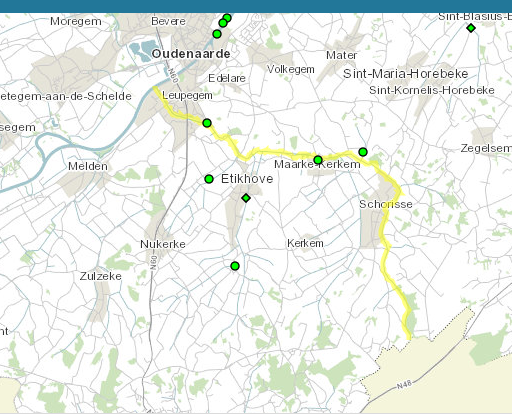

Exportar los datos del archivo datos/vmm_flowdata.csv a un DataFrame llamado data

In [49]:
data = pd.read_csv("datos/vmm_flowdata.csv")
data

,Time,L06_347,LS06_347,LS06_348
0,2009-01-01 00:00:00,0.137417,0.097500,0.016833
1,2009-01-01 03:00:00,0.131250,0.088833,0.016417
2,2009-01-01 06:00:00,0.113500,0.091250,0.016750
3,2009-01-01 09:00:00,0.135750,0.091500,0.016250
4,2009-01-01 12:00:00,0.140917,0.096167,0.017000
...,...,...,...,...
11692,2013-01-01 12:00:00,1.710000,1.710000,0.129583
11693,2013-01-01 15:00:00,1.420000,1.420000,0.096333
11694,2013-01-01 18:00:00,1.178583,1.178583,0.083083
11695,2013-01-01 21:00:00,0.898250,0.898250,0.077167


Ya sabemos cómo analizar una columna de fecha con Pandas:

In [50]:
#Convertir la columna 'Time' a tiempo
data['Time']=pd.to_datetime(data['Time'])

Con `set_index ('datetime')`, configuramos la columna con los valores de fecha y hora como índice de fila

In [51]:
#set_index("Time")
data.set_index('Time')
data

,Time,L06_347,LS06_347,LS06_348
0,2009-01-01 00:00:00,0.137417,0.097500,0.016833
1,2009-01-01 03:00:00,0.131250,0.088833,0.016417
2,2009-01-01 06:00:00,0.113500,0.091250,0.016750
3,2009-01-01 09:00:00,0.135750,0.091500,0.016250
4,2009-01-01 12:00:00,0.140917,0.096167,0.017000
...,...,...,...,...
11692,2013-01-01 12:00:00,1.710000,1.710000,0.129583
11693,2013-01-01 15:00:00,1.420000,1.420000,0.096333
11694,2013-01-01 18:00:00,1.178583,1.178583,0.083083
11695,2013-01-01 21:00:00,0.898250,0.898250,0.077167


In [52]:
#data


Los pasos anteriores se proporcionan como funcionalidad integrada de `read_csv`:

In [53]:
# Usar index_col=0, parse_dates=True para hacer la configuración de la columna de tiempo desde el inicio
data = pd.read_csv("datos/vmm_flowdata.csv", index_col=0, parse_dates=True)
data

,L06_347,LS06_347,LS06_348
Time,,,
2009-01-01 00:00:00,0.137417,0.097500,0.016833
2009-01-01 03:00:00,0.131250,0.088833,0.016417
2009-01-01 06:00:00,0.113500,0.091250,0.016750
2009-01-01 09:00:00,0.135750,0.091500,0.016250
2009-01-01 12:00:00,0.140917,0.096167,0.017000
...,...,...,...
2013-01-01 12:00:00,1.710000,1.710000,0.129583
2013-01-01 15:00:00,1.420000,1.420000,0.096333
2013-01-01 18:00:00,1.178583,1.178583,0.083083


RECUERDE: **`pd.read_csv` proporciona una gran cantidad de funciones integradas** 

Si queremos ver todos los indices de las filas

In [54]:
# data.index
data.index

DatetimeIndex(['2009-01-01 00:00:00', '2009-01-01 03:00:00',
               '2009-01-01 06:00:00', '2009-01-01 09:00:00',
               '2009-01-01 12:00:00', '2009-01-01 15:00:00',
               '2009-01-01 18:00:00', '2009-01-01 21:00:00',
               '2009-01-02 00:00:00', '2009-01-02 03:00:00',
               ...
               '2012-12-31 21:00:00', '2013-01-01 00:00:00',
               '2013-01-01 03:00:00', '2013-01-01 06:00:00',
               '2013-01-01 09:00:00', '2013-01-01 12:00:00',
               '2013-01-01 15:00:00', '2013-01-01 18:00:00',
               '2013-01-01 21:00:00', '2013-01-02 00:00:00'],
              dtype='datetime64[ns]', name='Time', length=11697, freq=None)

Hay algunos atributos de los valores del `timestamp` disponibles:

In [55]:
# data.index.day
data.index.day

Index([ 1,  1,  1,  1,  1,  1,  1,  1,  2,  2,
       ...
       31,  1,  1,  1,  1,  1,  1,  1,  1,  2],
      dtype='int32', name='Time', length=11697)

In [56]:
data.index.month

Index([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
       ...
       12,  1,  1,  1,  1,  1,  1,  1,  1,  1],
      dtype='int32', name='Time', length=11697)

In [57]:
# data.index.year
data.index.year

Index([2009, 2009, 2009, 2009, 2009, 2009, 2009, 2009, 2009, 2009,
       ...
       2012, 2013, 2013, 2013, 2013, 2013, 2013, 2013, 2013, 2013],
      dtype='int32', name='Time', length=11697)

In [58]:
data.index.hour==3

array([False,  True, False, ..., False, False, False])

In [59]:
data[(data.index.month==3)& (data.index.hour==3)]

,L06_347,LS06_347,LS06_348
Time,,,
2009-03-01 03:00:00,0.234250,0.191750,0.023417
2009-03-02 03:00:00,0.179417,0.132083,0.020250
2009-03-03 03:00:00,0.204917,0.158500,0.019333
2009-03-04 03:00:00,0.221750,0.176833,0.021917
2009-03-05 03:00:00,0.195583,0.148667,0.020500
...,...,...,...
2012-03-27 03:00:00,0.060083,0.121333,0.009000
2012-03-28 03:00:00,0.062333,0.120083,0.009083
2012-03-29 03:00:00,0.063833,0.121750,0.009250


La función `plot` también adaptará sus ejes siguiendo los índices de tiempo: 

In [60]:
# %matplotlib notebook



Seleccionemos los datos del año 2013

In [61]:
# '2013'


Normalmente esperaría que esto acceda a una columna llamada '2013', pero cuando se tiene la configuración de `DatetimeIndex`, Pandas también intenta  interpretarlo como las filas de fecha y hora.

<div class="alert alert-info">

<b>EJERCICIO</b>:

 <ul>
  <li>seleccione todos los datos a partir de 2012</li>
</ul>
</div>

In [62]:
data.loc['2012':,:]

,L06_347,LS06_347,LS06_348
Time,,,
2012-01-01 00:00:00,0.307167,0.273917,0.028000
2012-01-01 03:00:00,0.302917,0.270833,0.030583
2012-01-01 06:00:00,0.331500,0.284750,0.030917
2012-01-01 09:00:00,0.330750,0.293583,0.029750
2012-01-01 12:00:00,0.295000,0.285167,0.031750
...,...,...,...
2013-01-01 12:00:00,1.710000,1.710000,0.129583
2013-01-01 15:00:00,1.420000,1.420000,0.096333
2013-01-01 18:00:00,1.178583,1.178583,0.083083


<div class="alert alert-info">

<b>EJERCICIO</b>:

 <ul>
  <li>seleccione todos los datos en enero para todos los años diferentes</li>
</ul>
</div>

In [63]:
data[data.index.month==1]

,L06_347,LS06_347,LS06_348
Time,,,
2009-01-01 00:00:00,0.137417,0.097500,0.016833
2009-01-01 03:00:00,0.131250,0.088833,0.016417
2009-01-01 06:00:00,0.113500,0.091250,0.016750
2009-01-01 09:00:00,0.135750,0.091500,0.016250
2009-01-01 12:00:00,0.140917,0.096167,0.017000
...,...,...,...
2013-01-01 12:00:00,1.710000,1.710000,0.129583
2013-01-01 15:00:00,1.420000,1.420000,0.096333
2013-01-01 18:00:00,1.178583,1.178583,0.083083


<div class="alert alert-info">

<b>EJERCICIO</b>:

 <ul>
  <li>Seleccione todos los datos en abril, mayo y junio para todos los años diferentes</li>
</ul>
</div>

In [64]:
#Utilizaremos la función isin para filtrar sólo los valores de los meses que nos interesa

data[data.index.month.isin([4,5,6])]


,L06_347,LS06_347,LS06_348
Time,,,
2009-04-01 00:00:00,0.270417,0.233500,0.031250
2009-04-01 03:00:00,0.249917,0.247083,0.030750
2009-04-01 06:00:00,0.278167,0.260083,0.032583
2009-04-01 09:00:00,0.324833,0.301583,0.034250
2009-04-01 12:00:00,0.287917,0.254917,0.033833
...,...,...,...
2012-06-30 09:00:00,0.288000,0.060583,0.007333
2012-06-30 12:00:00,0.288000,0.061417,0.006333
2012-06-30 15:00:00,0.287583,0.063083,0.004833


<div class="alert alert-info">

<b>EJERCICIO</b>:

 <ul>
  <li>Seleccione todos los datos 'diurnos' (entre 8h y 20h) para todos los días</li>
</ul>
</div>

In [65]:
data[data.index.hour.isin(np.arange(0,21))]

,L06_347,LS06_347,LS06_348
Time,,,
2009-01-01 00:00:00,0.137417,0.097500,0.016833
2009-01-01 03:00:00,0.131250,0.088833,0.016417
2009-01-01 06:00:00,0.113500,0.091250,0.016750
2009-01-01 09:00:00,0.135750,0.091500,0.016250
2009-01-01 12:00:00,0.140917,0.096167,0.017000
...,...,...,...
2013-01-01 09:00:00,2.055000,2.055000,0.175667
2013-01-01 12:00:00,1.710000,1.710000,0.129583
2013-01-01 15:00:00,1.420000,1.420000,0.096333


<div class="alert alert-info">

<b>EJERCICIO</b>:

 <ul>
  <li> Hacer la grafica del promedio de los datos con una frecuencia semanal</li>
</ul>
</div>

<Axes: xlabel='Time'>

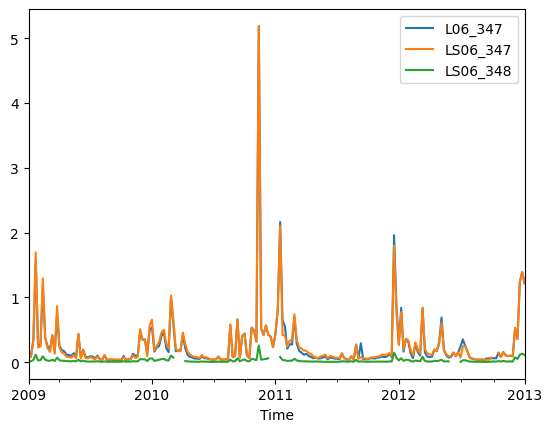

In [66]:
data.resample('W').mean().plot()

<div class="alert alert-info">

<b>EJERCICIO</b>:

 <ul>
  <li> Hacer la grafica del promedio de los datos pero ahora con una frecuencia de cada 10 días </li>
</ul>
</div>

<Axes: xlabel='Time'>

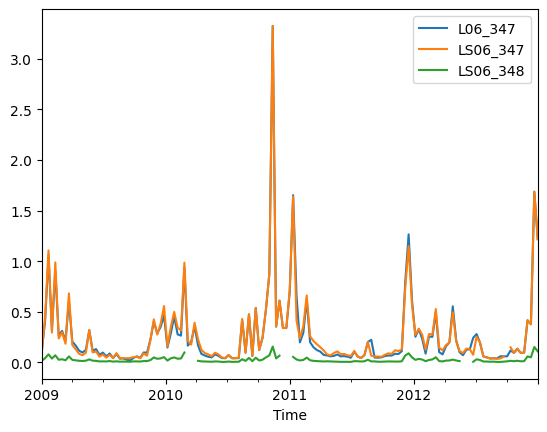

In [67]:
data.resample('10D').mean().plot()

<div class="alert alert-info">

<b>EJERCICIO</b>:

 <ul>
  <li>Graficar la desviación estándar mensual </li>
</ul>
</div>

/tmp/ipykernel_16537/632364832.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data.resample('M').std().plot()


<Axes: xlabel='Time'>

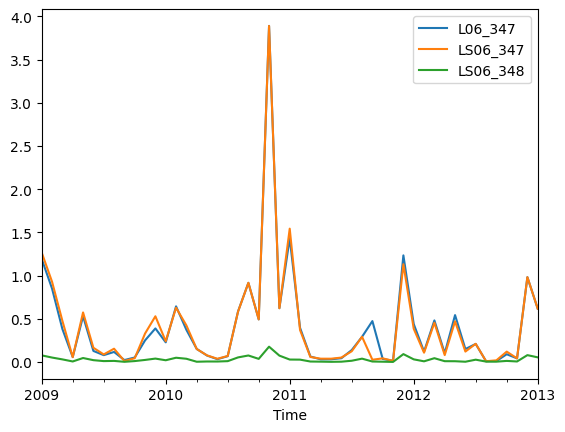

In [68]:
data.resample('M').std().plot() 

<div class="alert alert-info">

<b>EJERCICIO</b>:

 <ul>
  <li>Graficar la media y mediana mensual para los años 2011 al 2012 para la calumna 'L06_347'<br><br></li>
</ul>
    
</div>

/tmp/ipykernel_16537/4062447147.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data[data.index.year.isin([2011,2012])].resample('M').median().plot()


<Axes: xlabel='Time'>

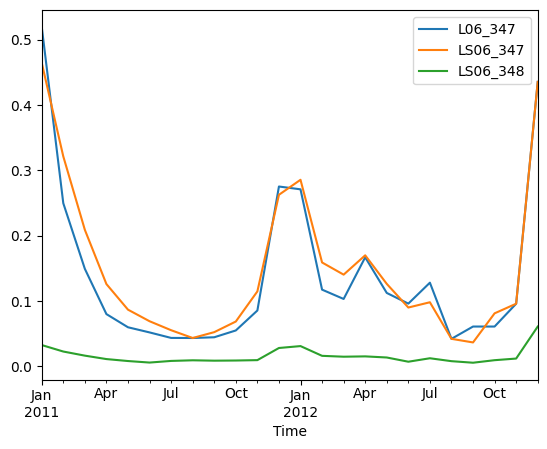

In [69]:
data[data.index.year.isin([2011,2012])].resample('M').median().plot()

<div class="alert alert-info">

<b>EJERCICIO</b>:

 <ul>
  <li>Encontrar el valor promedio diario de la columna 'LS06_348', con estos valores graficar el mínimo y máximo mensual </li>
</ul>
</div>

<div class="alert alert-info">
<b>EJERCICIO</b>:

 <ul>
  <li>Hacer una grafica de la media por semana de las tres estaciones en el año 2012</li>
</ul>

</div>

<div class="alert alert-info">
<b>EJERCICIO</b>:

<ul>
  <li>Muestre la comparación del promedio mensual y semanal para la estación L06_347 de Enero de 2010 a Junio de 2011  </li>
</ul>

</div>

In [70]:
from matplotlib import dates


## Ejemplo 2: Visualización de recuentos de bicicletas en Seattle

Como un ejemplo más complicado de trabajar con algunos datos de series de tiempo,
echemos un vistazo a los recuentos de bicicletas  de Seattle  en el [Puente Fremont](https://data.seattle.gov/api/views/65db-xm6k/rows.csv?accessType=DOWNLOAD).
Estos datos provienen de un contador de bicicletas automatizado, instalado a fines de 2012, que tiene sensores inductivos en las aceras este y oeste del puente. Los recuentos de bicicletas por hora se pueden descargar de http://data.seattle.gov/.


<img align="left" width="400"  float= "none" align="middle" src="figuras/seatle.jpg">

In [71]:
#Especificaremos que queremos la Fecha como índice:
data = pd.read_csv('datos/Fremont_Bridge_Bicycle_Counter.csv', index_col='Date', parse_dates=True)
data.head()

/tmp/ipykernel_16537/3692825042.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data = pd.read_csv('datos/Fremont_Bridge_Bicycle_Counter.csv', index_col='Date', parse_dates=True)


,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,,
2012-10-03 00:00:00,13.0,4.0,9.0
2012-10-03 01:00:00,10.0,4.0,6.0
2012-10-03 02:00:00,2.0,1.0,1.0
2012-10-03 03:00:00,5.0,2.0,3.0
2012-10-03 04:00:00,7.0,6.0,1.0


Para mayor comodidad, reasignameremos los nombres de las columnas y agregaremos una columna "Total":

In [72]:
data.shape

(137078, 3)

In [73]:
data.columns = ['Total','East', 'West']


Ahora echemos un vistazo a las estadísticas resumidas de estos datos:

In [74]:
data.describe()


,Total,East,West
count,137057.000000,137057.000000,137057.000000
mean,112.790452,51.411063,61.379390
std,143.368869,66.097014,89.246612
min,0.000000,0.000000,0.000000
25%,14.000000,6.000000,7.000000
50%,61.000000,28.000000,30.000000
75%,148.000000,69.000000,75.000000
max,1097.000000,698.000000,850.000000


#### a )  Visualizando los datos

Podemos obtener información sobre el conjunto de datos visualizándolo. Comencemos graficando los datos sin procesar:

In [75]:
#Opcional: Instalar seaborn con "pip install seaborn"
#En caso de no instalarlo, simplemente comentar la siguiente línea de codigo 
import seaborn; seaborn.set()

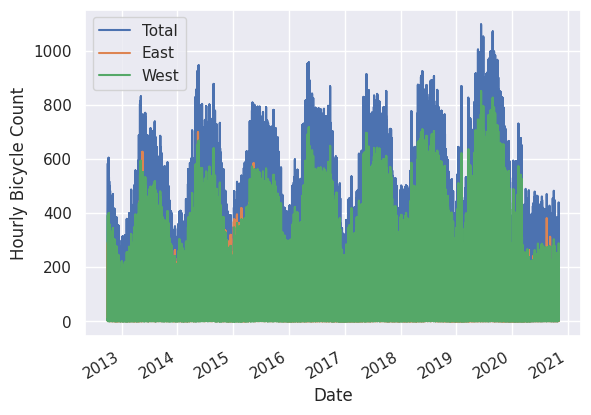

In [76]:
data.plot()
plt.ylabel('Hourly Bicycle Count');

Las ~137 mil muestras por hora son demasiado densas para que podamos entenderlas. Podemos obtener más información volviendo a muestrear los datos por semana:

Text(0, 0.5, 'Weekly bicycle count')

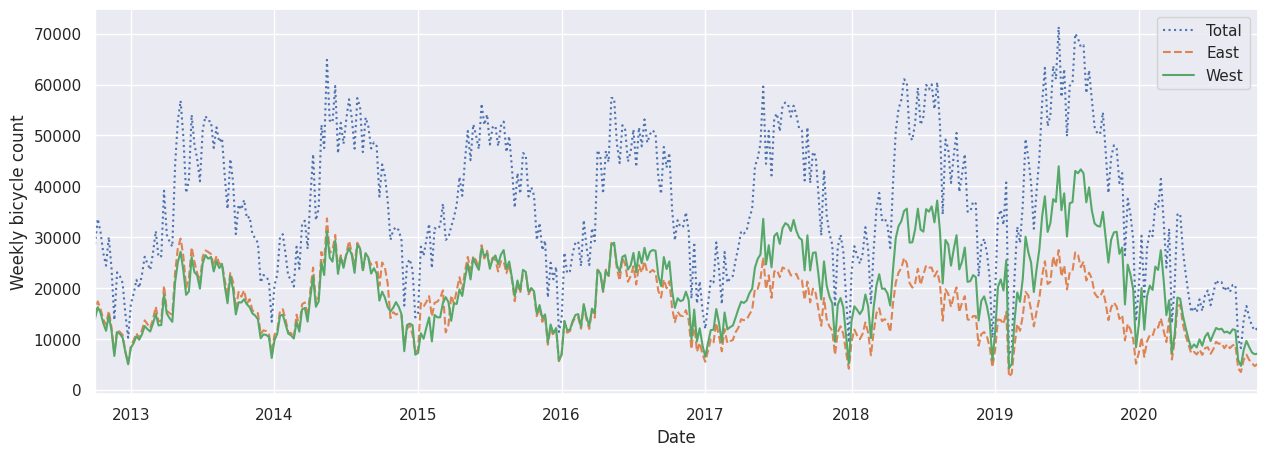

In [77]:
weekly = data.resample('W').sum()
weekly.plot(style=[':', '--', '-'],figsize=(15,5))
plt.ylabel('Weekly bicycle count')

Esto nos muestra algunas tendencias estacionales interesantes: como era de esperar, la gente anda en bicicleta más en verano que en invierno, e incluso dentro de una temporada en particular, el uso de la bicicleta varía de una semana a otra (probablemente dependiendo del clima). *Incluso se puede notar el efecto del confinamiento debido a la pandemia Covid-19 durante este 2020*

Otra forma que resulta útil para agregar los datos es usar una media móvil, utilizando la función ``rolling()``, el cual funciona como una especie de filtro. Aquí haremos una media móvil de 30 días de nuestros datos:

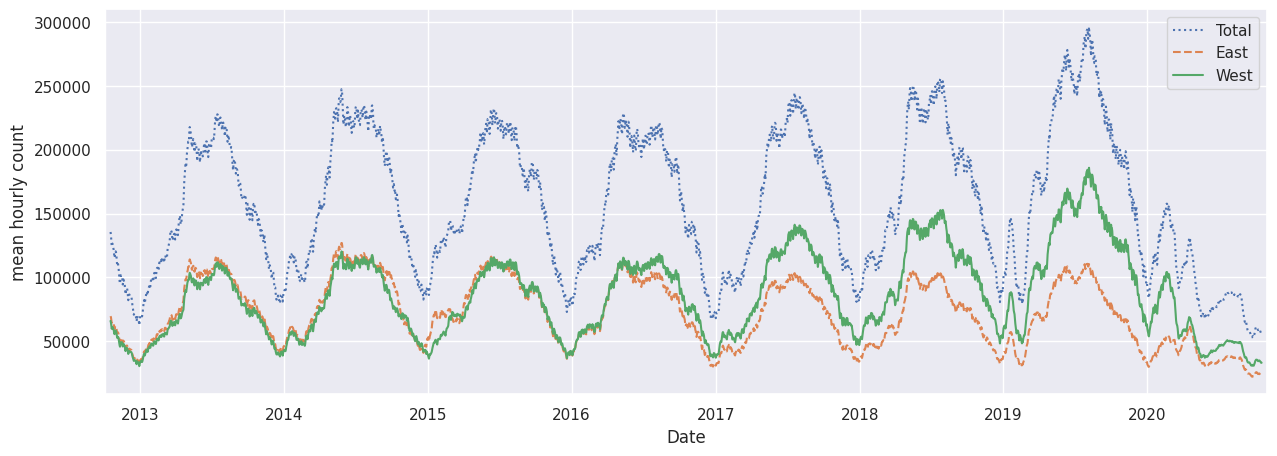

In [78]:
daily = data.resample('D').sum()
daily.rolling(30, center=True).sum().plot(style=[':', '--', '-'],figsize=(15,5))
plt.ylabel('mean hourly count');

Nota: La función pandas ``rolling()``  proporciona la función de cálculos de ventana móvil. El concepto de cálculo de la ventana móvil se utiliza principalmente en el procesamiento de señales y datos de series de tiempo. En pocas palabras, tomamos un tamaño de ventana de *k* a la vez y realizamos alguna operación matemática deseada en él. Una ventana de tamaño *k* significa *k* valores consecutivos a la vez. En un caso muy simple, todos los valores de "k" están igualmente ponderados.

Más información:
* https://youtu.be/F6JIXr4-4Tw?si=UbMM6QRNTiHH5VhI
* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.rolling.html


La irregularidad del resultado se debe al corte brusco de la ventana móvil. Podemos obtener una versión más suave de una media móvil usando una función de ventana, por ejemplo, una ventana gaussiana. El siguiente código especifica tanto el ancho de la ventana (elegimos 60 días) como el ancho de Gauss dentro de la ventana (elegimos 10 días como el ancho o desviación estandar):

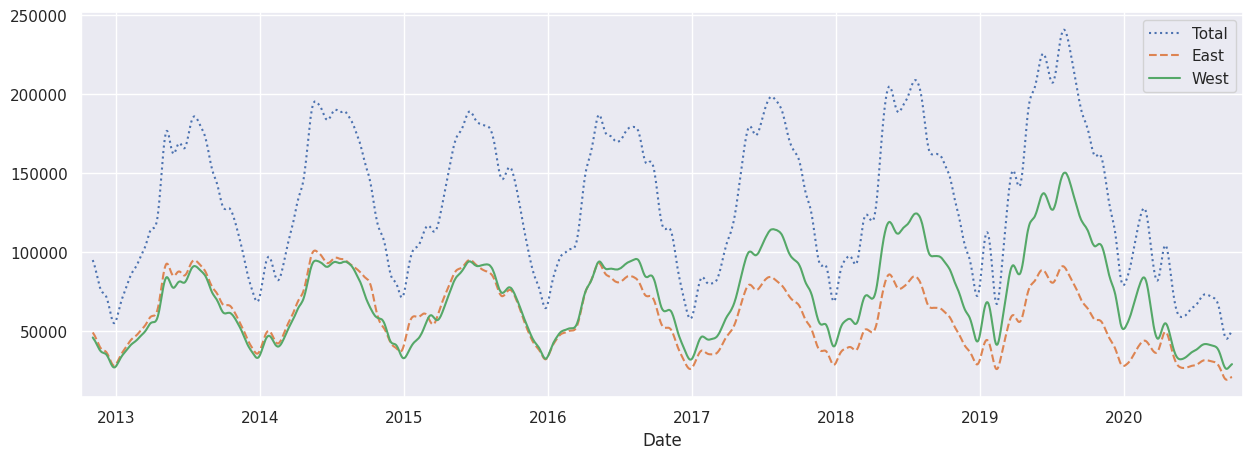

In [79]:
daily.rolling(60, center=True,
              win_type='gaussian').sum(std=10).plot(style=[':', '--', '-'],figsize=(15,5));

#### b) Profundizando en los datos

Si bien estas vistas de datos suavizadas son útiles para tener una idea de la tendencia general de los datos, ocultan gran parte de la estructura interesante.
Por ejemplo, podríamos querer ver el tráfico promedio en función de la hora del día.

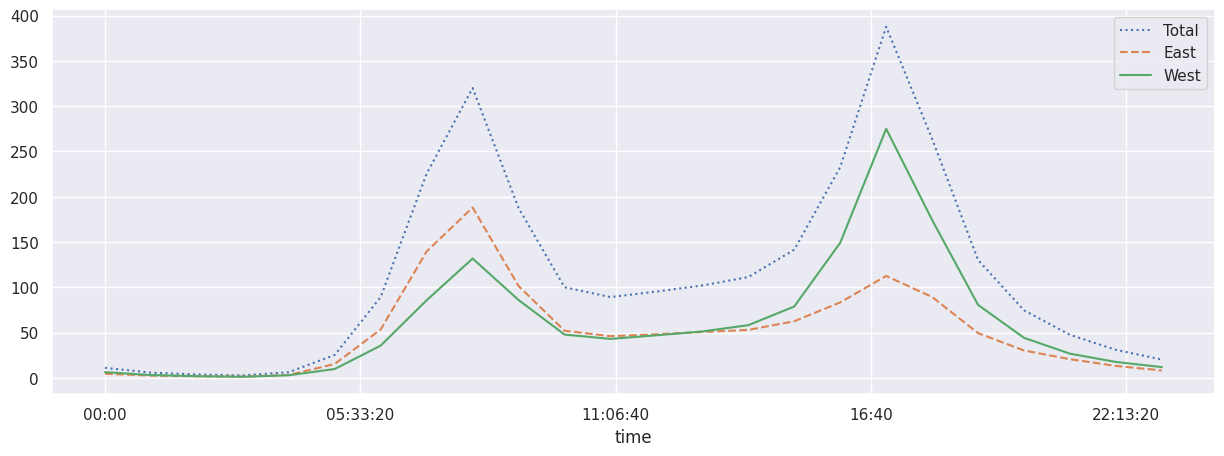

In [80]:
by_time = data.groupby(data.index.time).mean()
by_time.plot(style=[':', '--', '-'],figsize=(15,5));

El tráfico horario tiene una distribución fuertemente bimodal, con picos alrededor de las 8:00 de la mañana y las 5:00 de la tarde.
Probablemente esto sea evidencia de un fuerte componente de tráfico de pasajeros que cruza el puente.
Esto se evidencia aún más por las diferencias entre la acera occidental (generalmente se usa yendo hacia el centro de Seattle), que alcanza su punto máximo por la mañana, y la acera este (generalmente se usa alejándose del centro de Seattle), que alcanza su punto máximo por la noche.

También podríamos sentir curiosidad por saber cómo cambian las cosas según el día de la semana. Nuevamente, podemos hacer esto con un simple groupby:


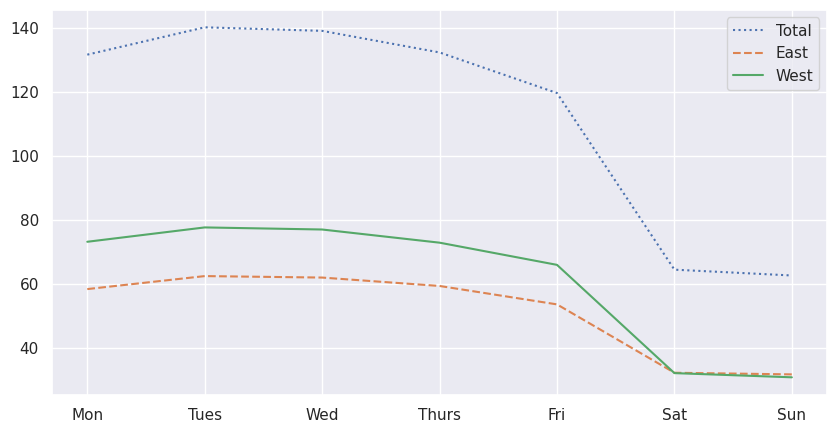

In [81]:
by_weekday = data.groupby(data.index.dayofweek).mean()
by_weekday.index = ['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun']
by_weekday.plot(style=[':', '--', '-'],figsize=(10,5));

Esto muestra una fuerte distinción entre los totales de los días laborables y los fines de semana, con aproximadamente el doble de ciclistas promedio que cruzan el puente de lunes a viernes que los sábados y domingos.

Con esto en mente, hagamos un GroupBy compuesto y observemos la tendencia horaria entre semana frente a fines de semana. Comenzaremos agrupando por una bandera que marca el fin de semana y la hora del día:

In [82]:
weekend = np.where(data.index.weekday < 5, 'Weekday', 'Weekend')
by_time = data.groupby([weekend, data.index.time]).mean()

Haciendo la grafica separada de lunes a viernes y para  los sábados y domingos.

<Axes: title={'center': 'Weekends'}, xlabel='time'>

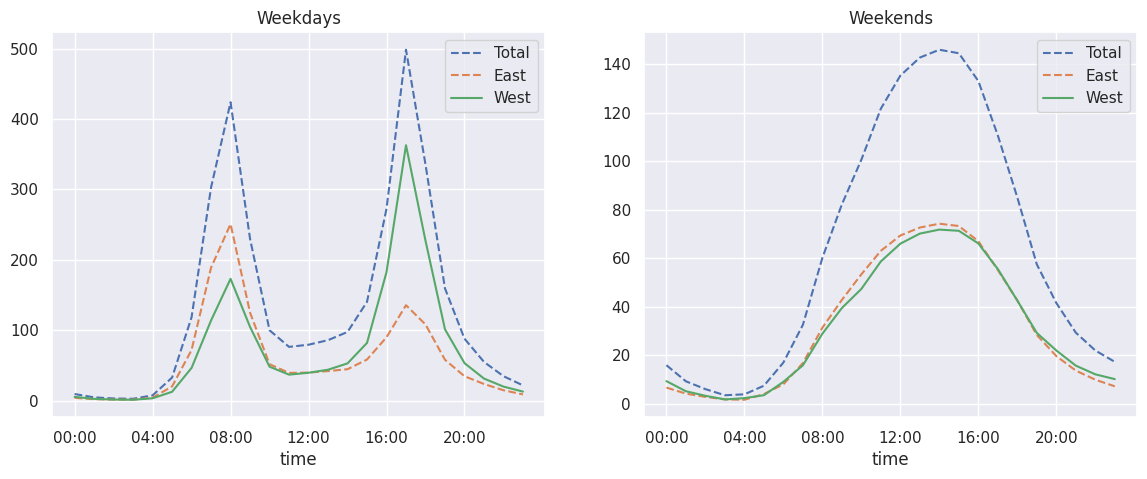

In [90]:
import matplotlib.pyplot as plt
hourly_ticks = 4 * 60 * 60 * np.arange(6)

fig, ax = plt.subplots(1, 2, figsize=(14, 5))
by_time.loc['Weekday'].plot(ax=ax[0], title='Weekdays',
                           xticks=hourly_ticks, style=['--', '--', '-'])
by_time.loc['Weekend'].plot(ax=ax[1], title='Weekends',
                           xticks=hourly_ticks, style=['--', '--', '-'])



El resultado es muy interesante: vemos un patrón de viaje bimodal durante la semana laboral y un patrón recreativo unimodal durante los fines de semana.
Sería interesante analizar estos datos con más detalle y examinar el efecto del clima, la temperatura, la época del año y otros factores en los patrones de desplazamiento de las personas.

NOTA: Los temas discutidos en esta lección son los más importantes y los que más suelen utilizarse, se deja al lector el siguiente link para abundar en este tema

https://www.dataquest.io/blog/tutorial-time-series-analysis-with-pandas/
